In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [261]:
df=pd.read_csv('/Users/mayurimamdi/Downloads/KNNAlgorithmDataset.csv')

In [262]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<Axes: >

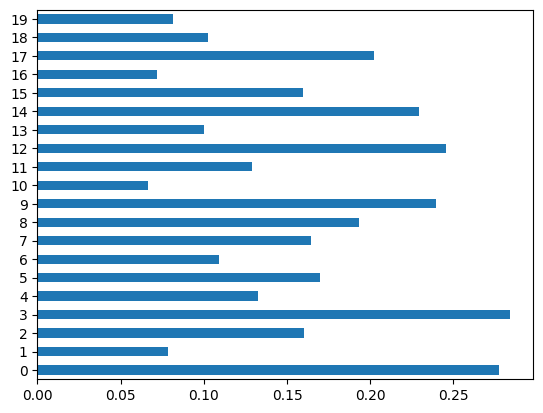

In [263]:
df['compactness_mean'].iloc[:20].plot(kind='barh')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [265]:
df.shape

(569, 33)

### EDA

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

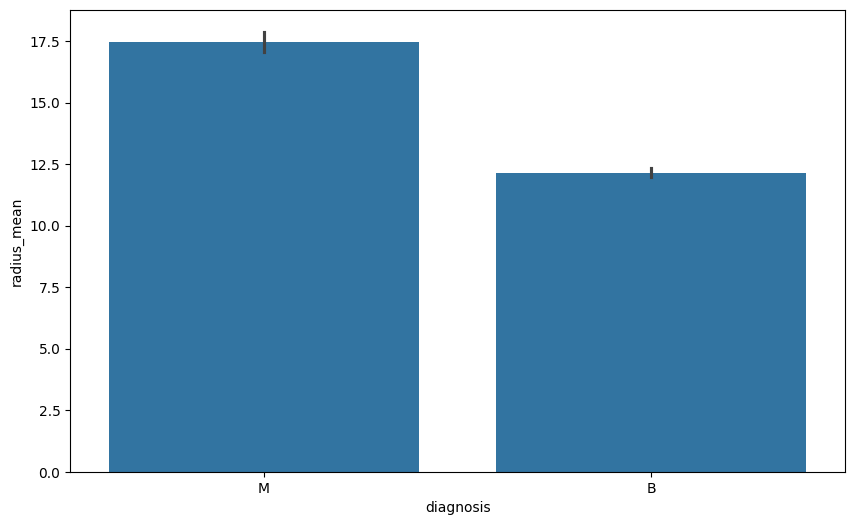

In [266]:
plt.figure(figsize=(10,6))
sns.barplot(x='diagnosis',y='radius_mean',data=df)

<Axes: xlabel='perimeter_mean', ylabel='area_mean'>

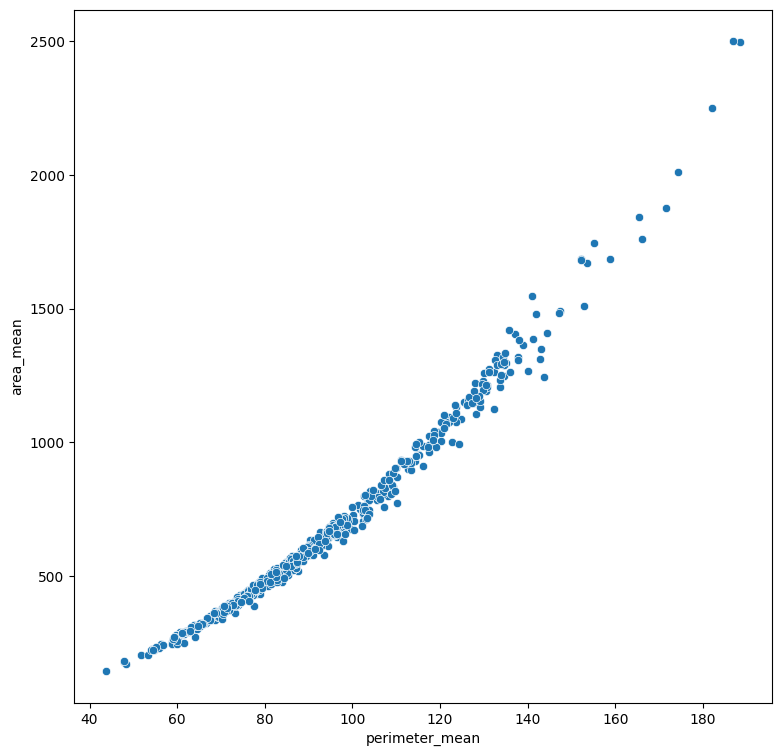

In [267]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='perimeter_mean',y='area_mean', data=df)

Seems like a linear Relation

<Axes: xlabel='diagnosis', ylabel='compactness_mean'>

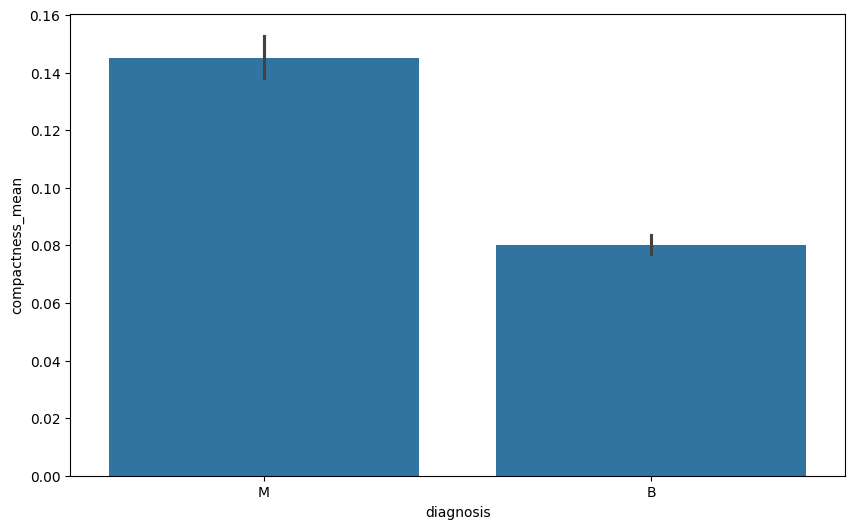

In [268]:
plt.figure(figsize=(10,6))
sns.barplot(x='diagnosis',y='compactness_mean',data=df)

([<matplotlib.patches.Wedge at 0x13066e990>,
 [Text(-1.0130424769803674, -0.4286548026483338, 'Benign'),
  Text(1.0130423373068502, 0.4286551327394486, 'Malignant')],
 [Text(-0.5525686238074731, -0.23381171053545477, '62.7%'),
  Text(0.5525685476219182, 0.23381189058515375, '37.3%')])

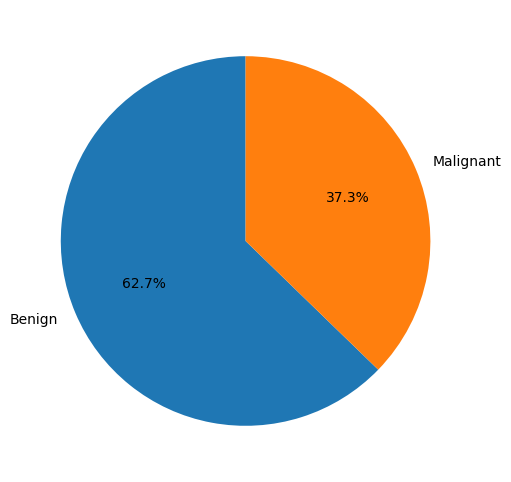

In [269]:
plt.figure(figsize=(10,6))
plt.pie(df['diagnosis'].value_counts(), labels=['Benign','Malignant'], autopct='%1.1f%%', startangle=90)

Text(0, 0.5, 'Smoothness Mean')

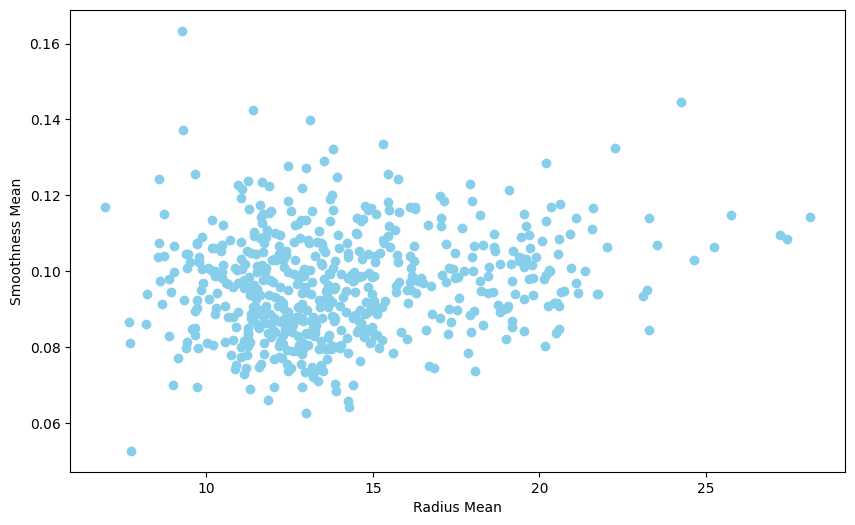

In [270]:
plt.figure(figsize=(10,6))
plt.plot(df['radius_mean'], df['smoothness_mean'], 'o', color='skyblue')
plt.xlabel('Radius Mean')
plt.ylabel('Smoothness Mean')	

<Axes: >

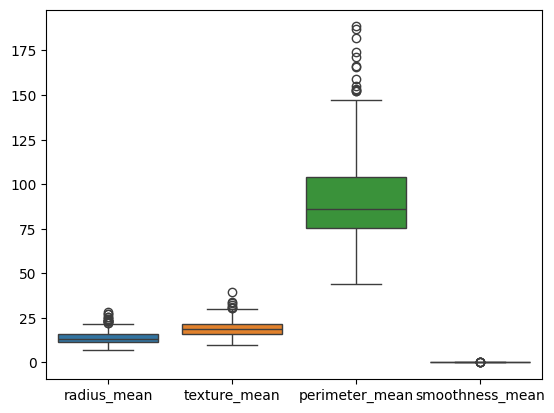

In [271]:
sns.boxplot(data=df[['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean']])

In [272]:
features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean'
]


<Axes: >

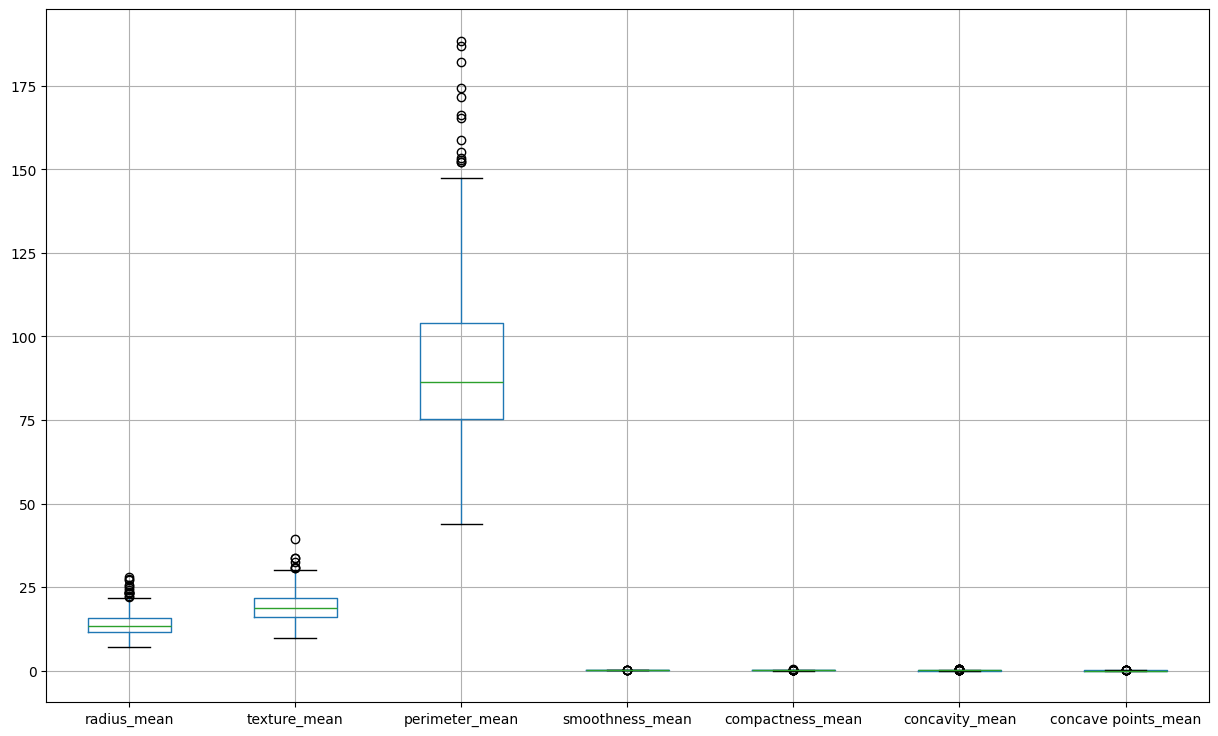

In [273]:
plt.figure(figsize=(15,9))
df[features].boxplot()

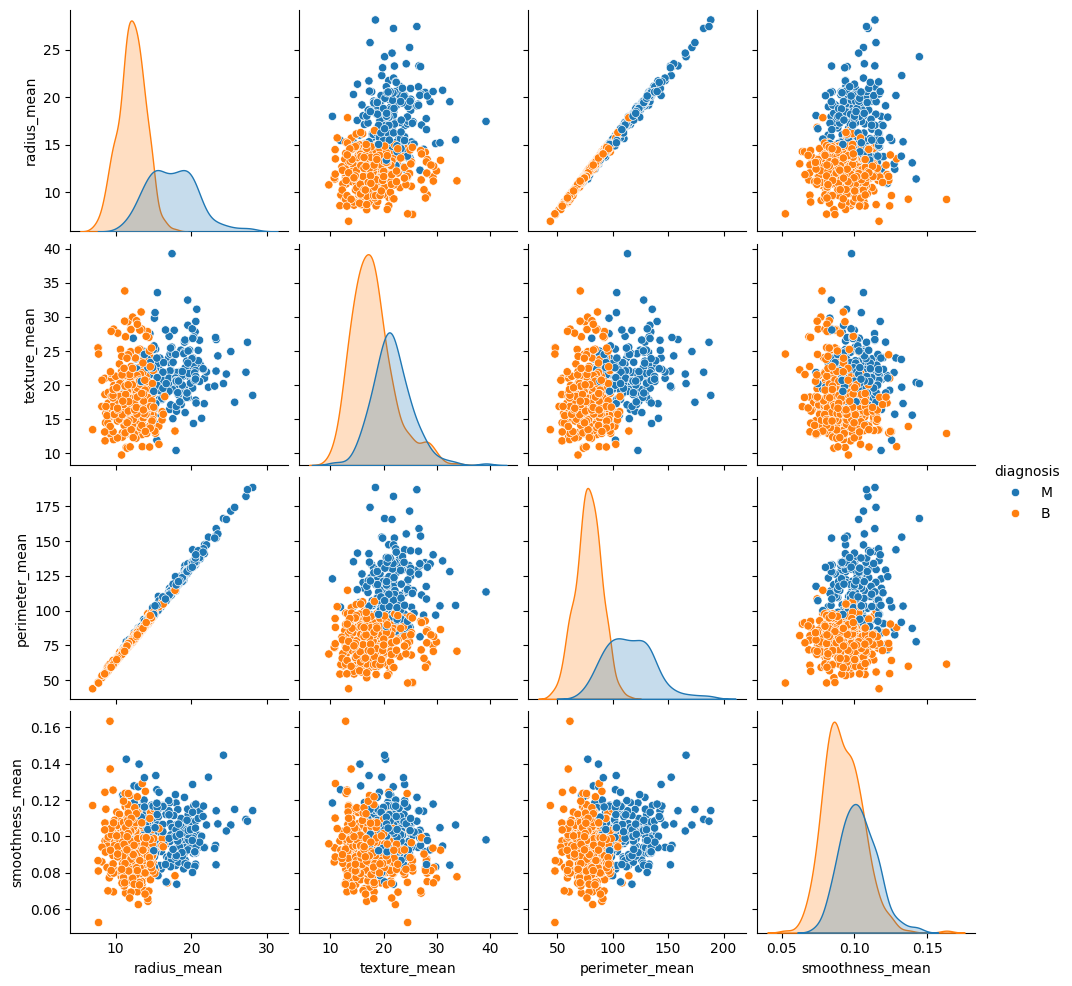

In [274]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'diagnosis']], hue='diagnosis')

### Feature Engineering

In [275]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

<Axes: >

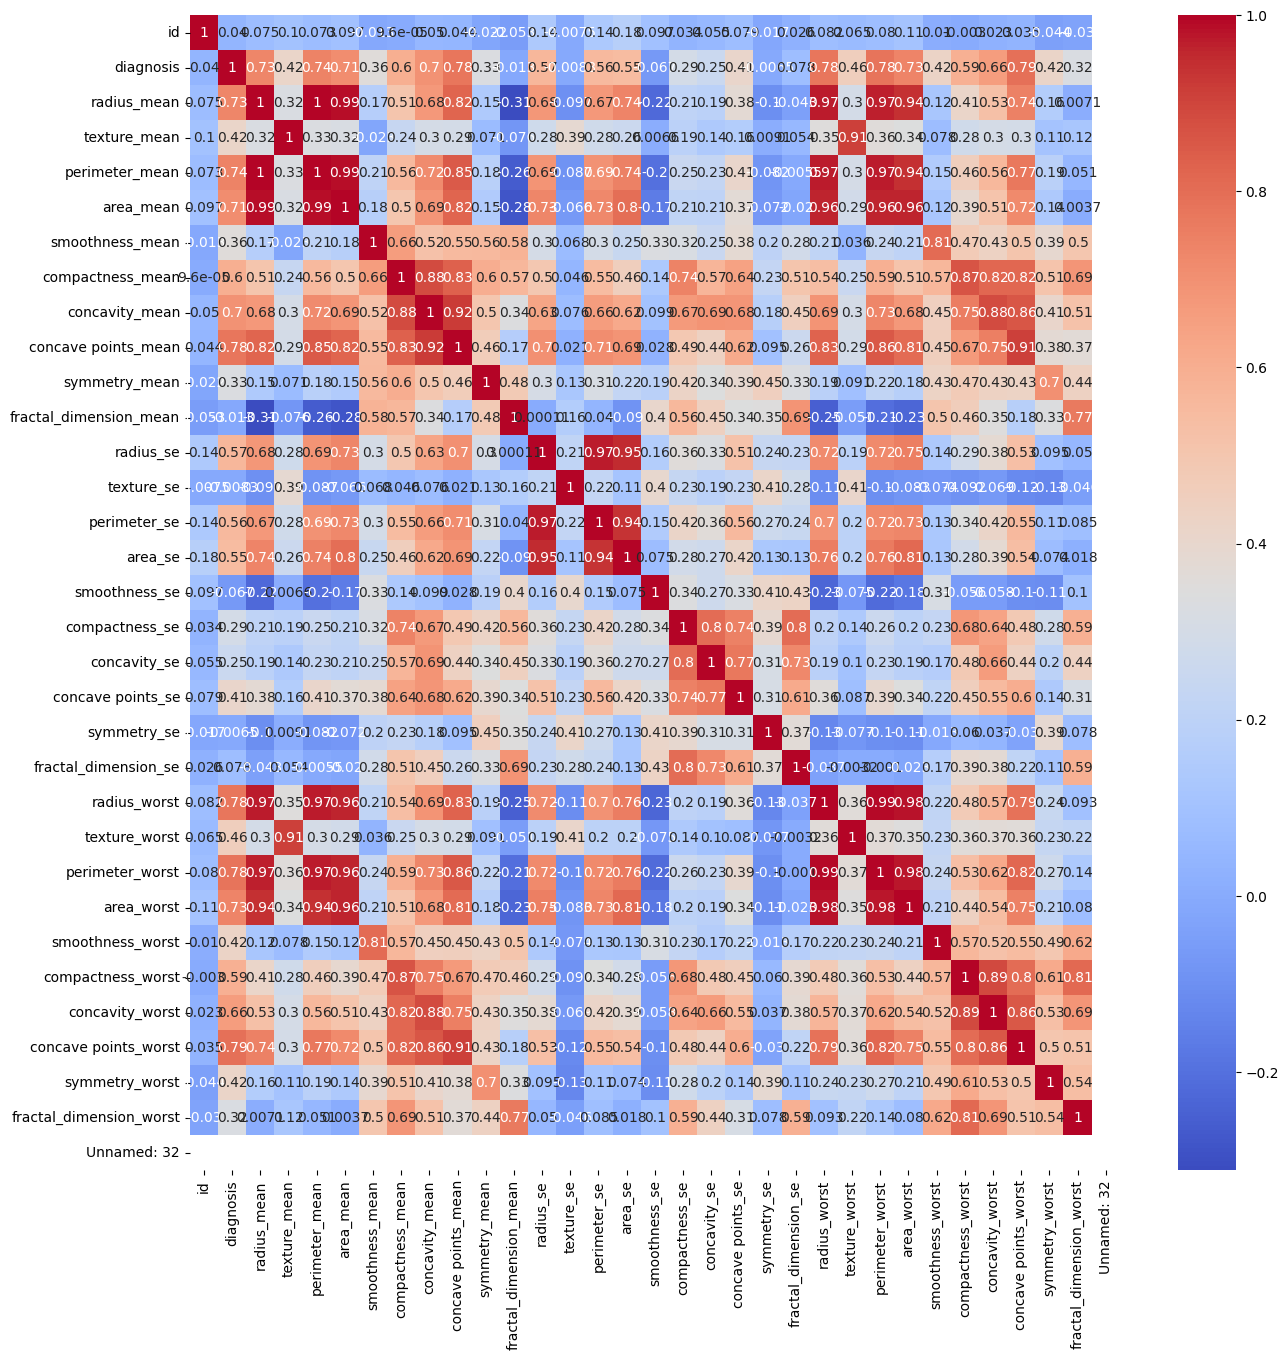

In [276]:
corr_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [277]:
df['Unnamed: 32'].value_counts()

Series([], Name: count, dtype: int64)

IT has Nothing in it, lets drop it out

In [278]:
df.drop('Unnamed: 32', axis=1, inplace=True)

Took it from sklearn Documentation

### Feature selection

In [279]:
def correlation(dataset, threshold):
		col_corr = set() 
		corr_matrix = dataset.corr()
		for i in range(len(corr_matrix.columns)):
				for j in range(i):
						if abs(corr_matrix.iloc[i, j]) > threshold:
								colname = corr_matrix.columns[i] 
								col_corr.add(colname)
		return col_corr

In [280]:
select_feature = correlation(df,0.85)
select_feature

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [281]:
df.drop(select_feature, axis=1, inplace=True)

<Axes: >

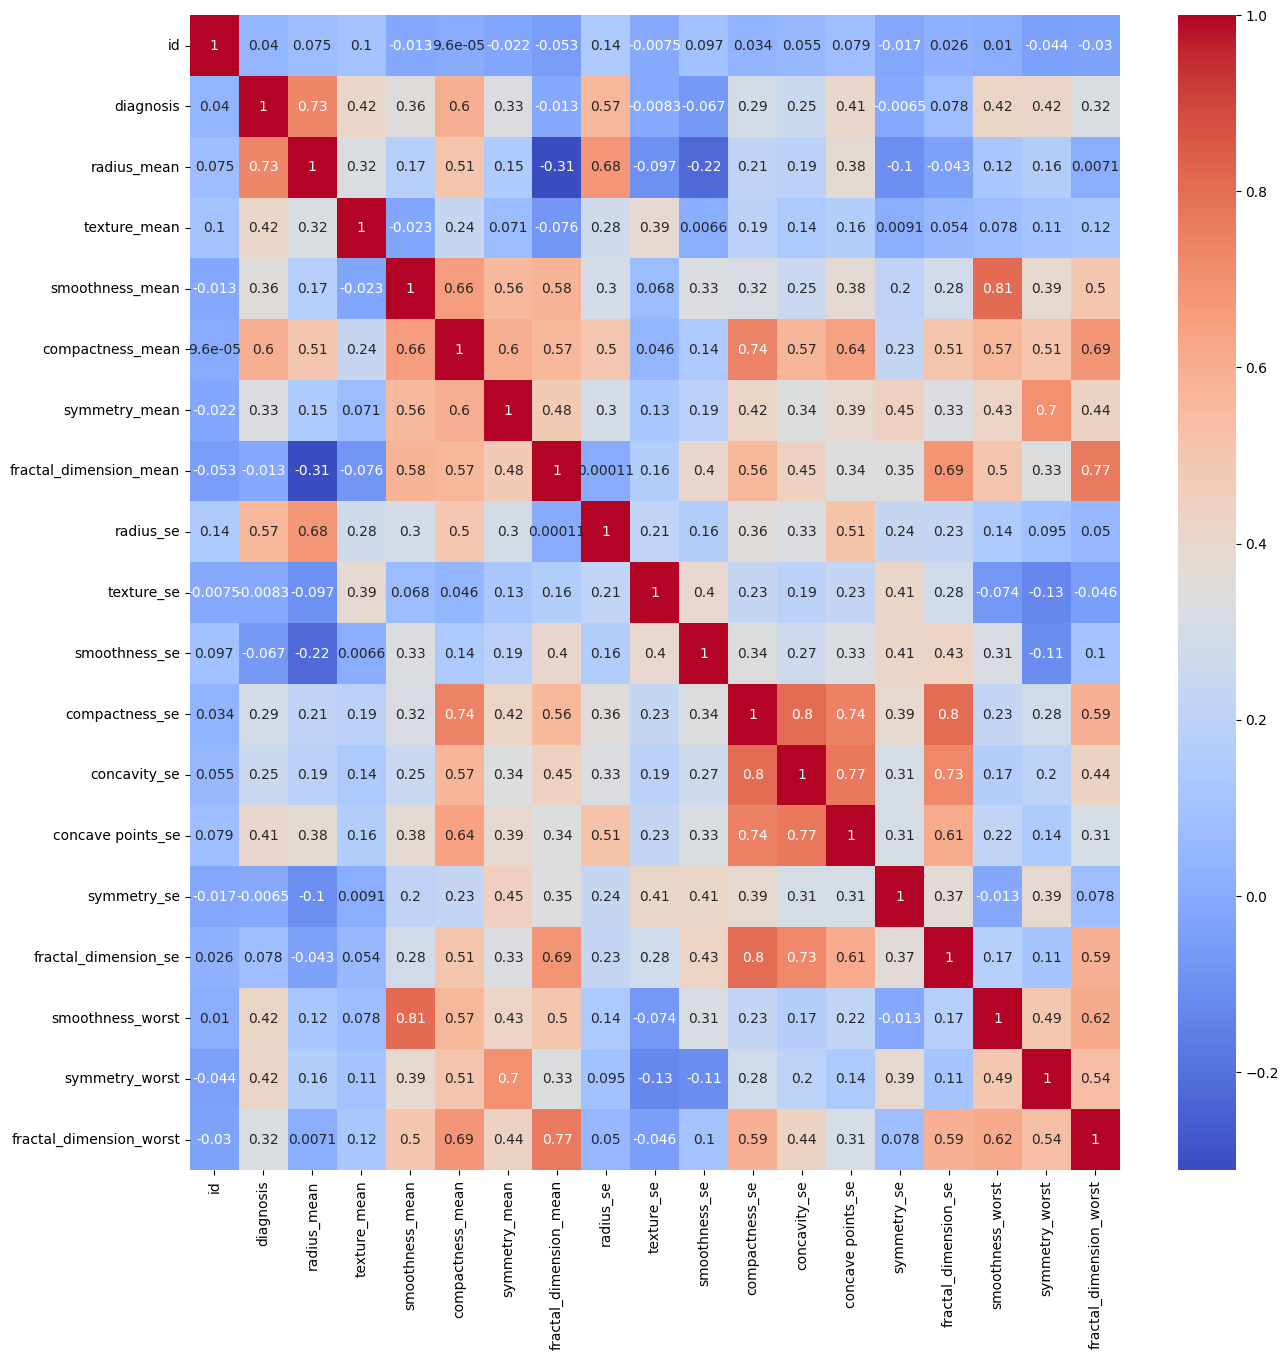

In [282]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap='coolwarm')

Now it looks quite clean 

We should try other feature selection techniques as well

In [283]:
X=df.drop(columns=['diagnosis','id'], axis=1)
y=df['diagnosis']

In [284]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X,y)
mi=pd.Series(mi, index=X.columns)
mi=mi.sort_values(ascending=False)
mi

radius_mean                0.367839
radius_se                  0.249579
compactness_mean           0.215160
concave points_se          0.129086
concavity_se               0.116677
texture_mean               0.095131
smoothness_worst           0.094096
symmetry_worst             0.091732
smoothness_mean            0.082652
compactness_se             0.074682
fractal_dimension_worst    0.064431
symmetry_mean              0.063465
fractal_dimension_se       0.038374
smoothness_se              0.014648
symmetry_se                0.011299
fractal_dimension_mean     0.006954
texture_se                 0.000000
dtype: float64

In [285]:
imp_fea=mi.nlargest(12).index
imp_fea

Index(['radius_mean', 'radius_se', 'compactness_mean', 'concave points_se',
       'concavity_se', 'texture_mean', 'smoothness_worst', 'symmetry_worst',
       'smoothness_mean', 'compactness_se', 'fractal_dimension_worst',
       'symmetry_mean'],
      dtype='object')

In [286]:
df=df[imp_fea]
df.head()

,radius_mean,radius_se,compactness_mean,concave points_se,concavity_se,texture_mean,smoothness_worst,symmetry_worst,smoothness_mean,compactness_se,fractal_dimension_worst,symmetry_mean
0,17.99,1.0950,0.27760,0.01587,0.05373,10.38,0.1622,0.4601,0.11840,0.04904,0.11890,0.2419
1,20.57,0.5435,0.07864,0.01340,0.01860,17.77,0.1238,0.2750,0.08474,0.01308,0.08902,0.1812
2,19.69,0.7456,0.15990,0.02058,0.03832,21.25,0.1444,0.3613,0.10960,0.04006,0.08758,0.2069
3,11.42,0.4956,0.28390,0.01867,0.05661,20.38,0.2098,0.6638,0.14250,0.07458,0.17300,0.2597
4,20.29,0.7572,0.13280,0.01885,0.05688,14.34,0.1374,0.2364,0.10030,0.02461,0.07678,0.1809


In [287]:
X_fs=df
X_fs.head()

,radius_mean,radius_se,compactness_mean,concave points_se,concavity_se,texture_mean,smoothness_worst,symmetry_worst,smoothness_mean,compactness_se,fractal_dimension_worst,symmetry_mean
0,17.99,1.0950,0.27760,0.01587,0.05373,10.38,0.1622,0.4601,0.11840,0.04904,0.11890,0.2419
1,20.57,0.5435,0.07864,0.01340,0.01860,17.77,0.1238,0.2750,0.08474,0.01308,0.08902,0.1812
2,19.69,0.7456,0.15990,0.02058,0.03832,21.25,0.1444,0.3613,0.10960,0.04006,0.08758,0.2069
3,11.42,0.4956,0.28390,0.01867,0.05661,20.38,0.2098,0.6638,0.14250,0.07458,0.17300,0.2597
4,20.29,0.7572,0.13280,0.01885,0.05688,14.34,0.1374,0.2364,0.10030,0.02461,0.07678,0.1809


In [288]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Now lets do feature Scaling

In [289]:
mm=MinMaxScaler()
mm.fit(X_fs)
X_fs=mm.transform(X_fs)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y,test_size=0.2, random_state=42)

In [291]:
X_train.shape

(455, 12)

In [292]:
X_test.shape

(114, 12)

In [293]:
y_train.shape

(455,)

In [294]:
y_test.shape

(114,)

In [295]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))	

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[68  3]
 [ 3 40]]


In [296]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
predic=svc.predict(X_test)
print(classification_report(y_test, predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[70  1]
 [ 4 39]]


95% accuracy, amazing results 